In [37]:
#Extract state columns and coordinate from csv file

import pandas as pd

real_data = pd.read_csv('690C.csv')
predicted_data = pd.read_csv('Predicted_690_2.csv')

#Extract state columns and coordinate

print('Real data columns ',real_data.columns)
print('Predicted data columns ',predicted_data.columns)



Real data columns  Index(['X', 'Y', 'TempState1', 'Temp_int', 'TempState251', 'TempState501',
       'TempState751', 'TempState1001', 'TempState1251', 'TempState1501',
       ...
       'TempState26751', 'TempState27001', 'TempState27251', 'TempState27501',
       'TempState27751', 'TempState28001', 'TempState28251', 'TempState28501',
       'TempState28751', 'TempState29001'],
      dtype='object', length=120)
Predicted data columns  Index(['TempState1', 'TempState251', 'TempState501', 'TempState751',
       'TempState1001', 'TempState1251', 'TempState1501', 'TempState1751',
       'TempState2001', 'TempState2251',
       ...
       'TempState26751', 'TempState27001', 'TempState27251', 'TempState27501',
       'TempState27751', 'TempState28001', 'TempState28251', 'TempState28501',
       'TempState28751', 'TempState29001'],
      dtype='object', length=117)


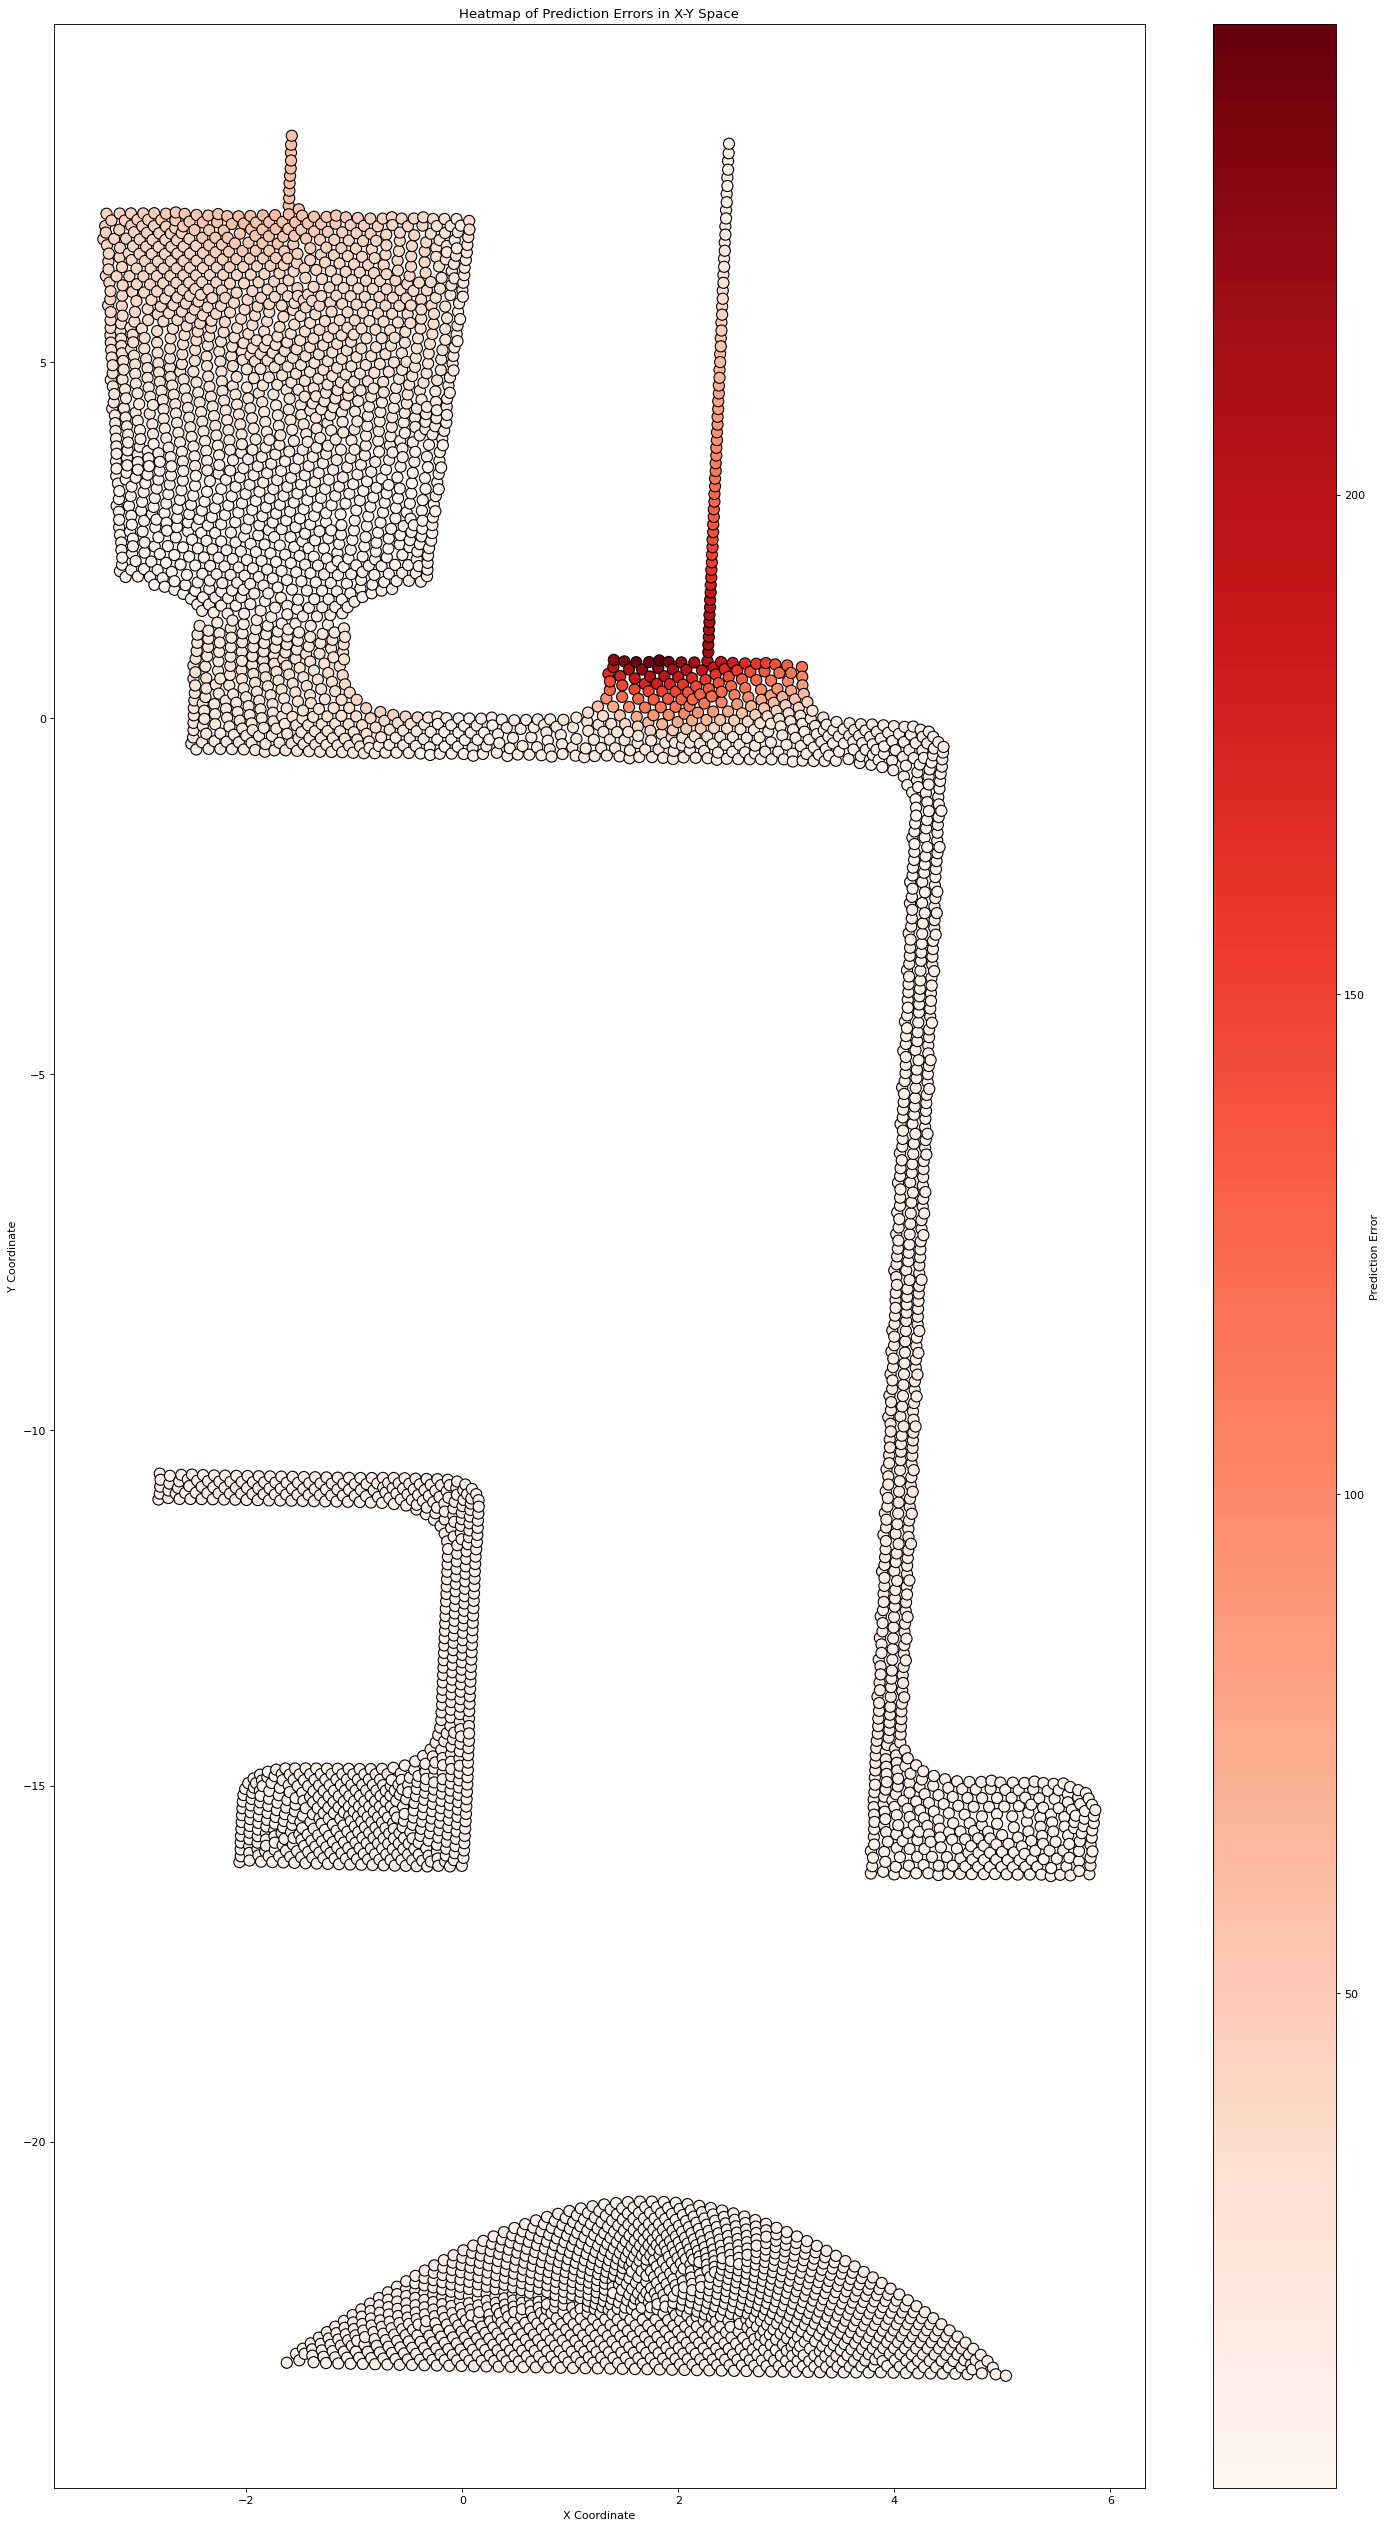

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Error
error = np.abs(real_data[['TempState1', 'TempState27251', 'TempState29001']] - 
               predicted_data[['TempState1', 'TempState27251', 'TempState29001']])
error['TotalError'] = error.sum(axis=1)  # Sum across all states

# Scatter Plot with Heatmap Colors
plt.figure(figsize=(22, 40),dpi=80)
scatter = plt.scatter(real_data['X'], real_data['Y'], c=error['TotalError'], cmap='Reds', edgecolor='k', s=100)
plt.colorbar(scatter, label="Prediction Error")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Heatmap of Prediction Errors in X-Y Space")

plt.show()

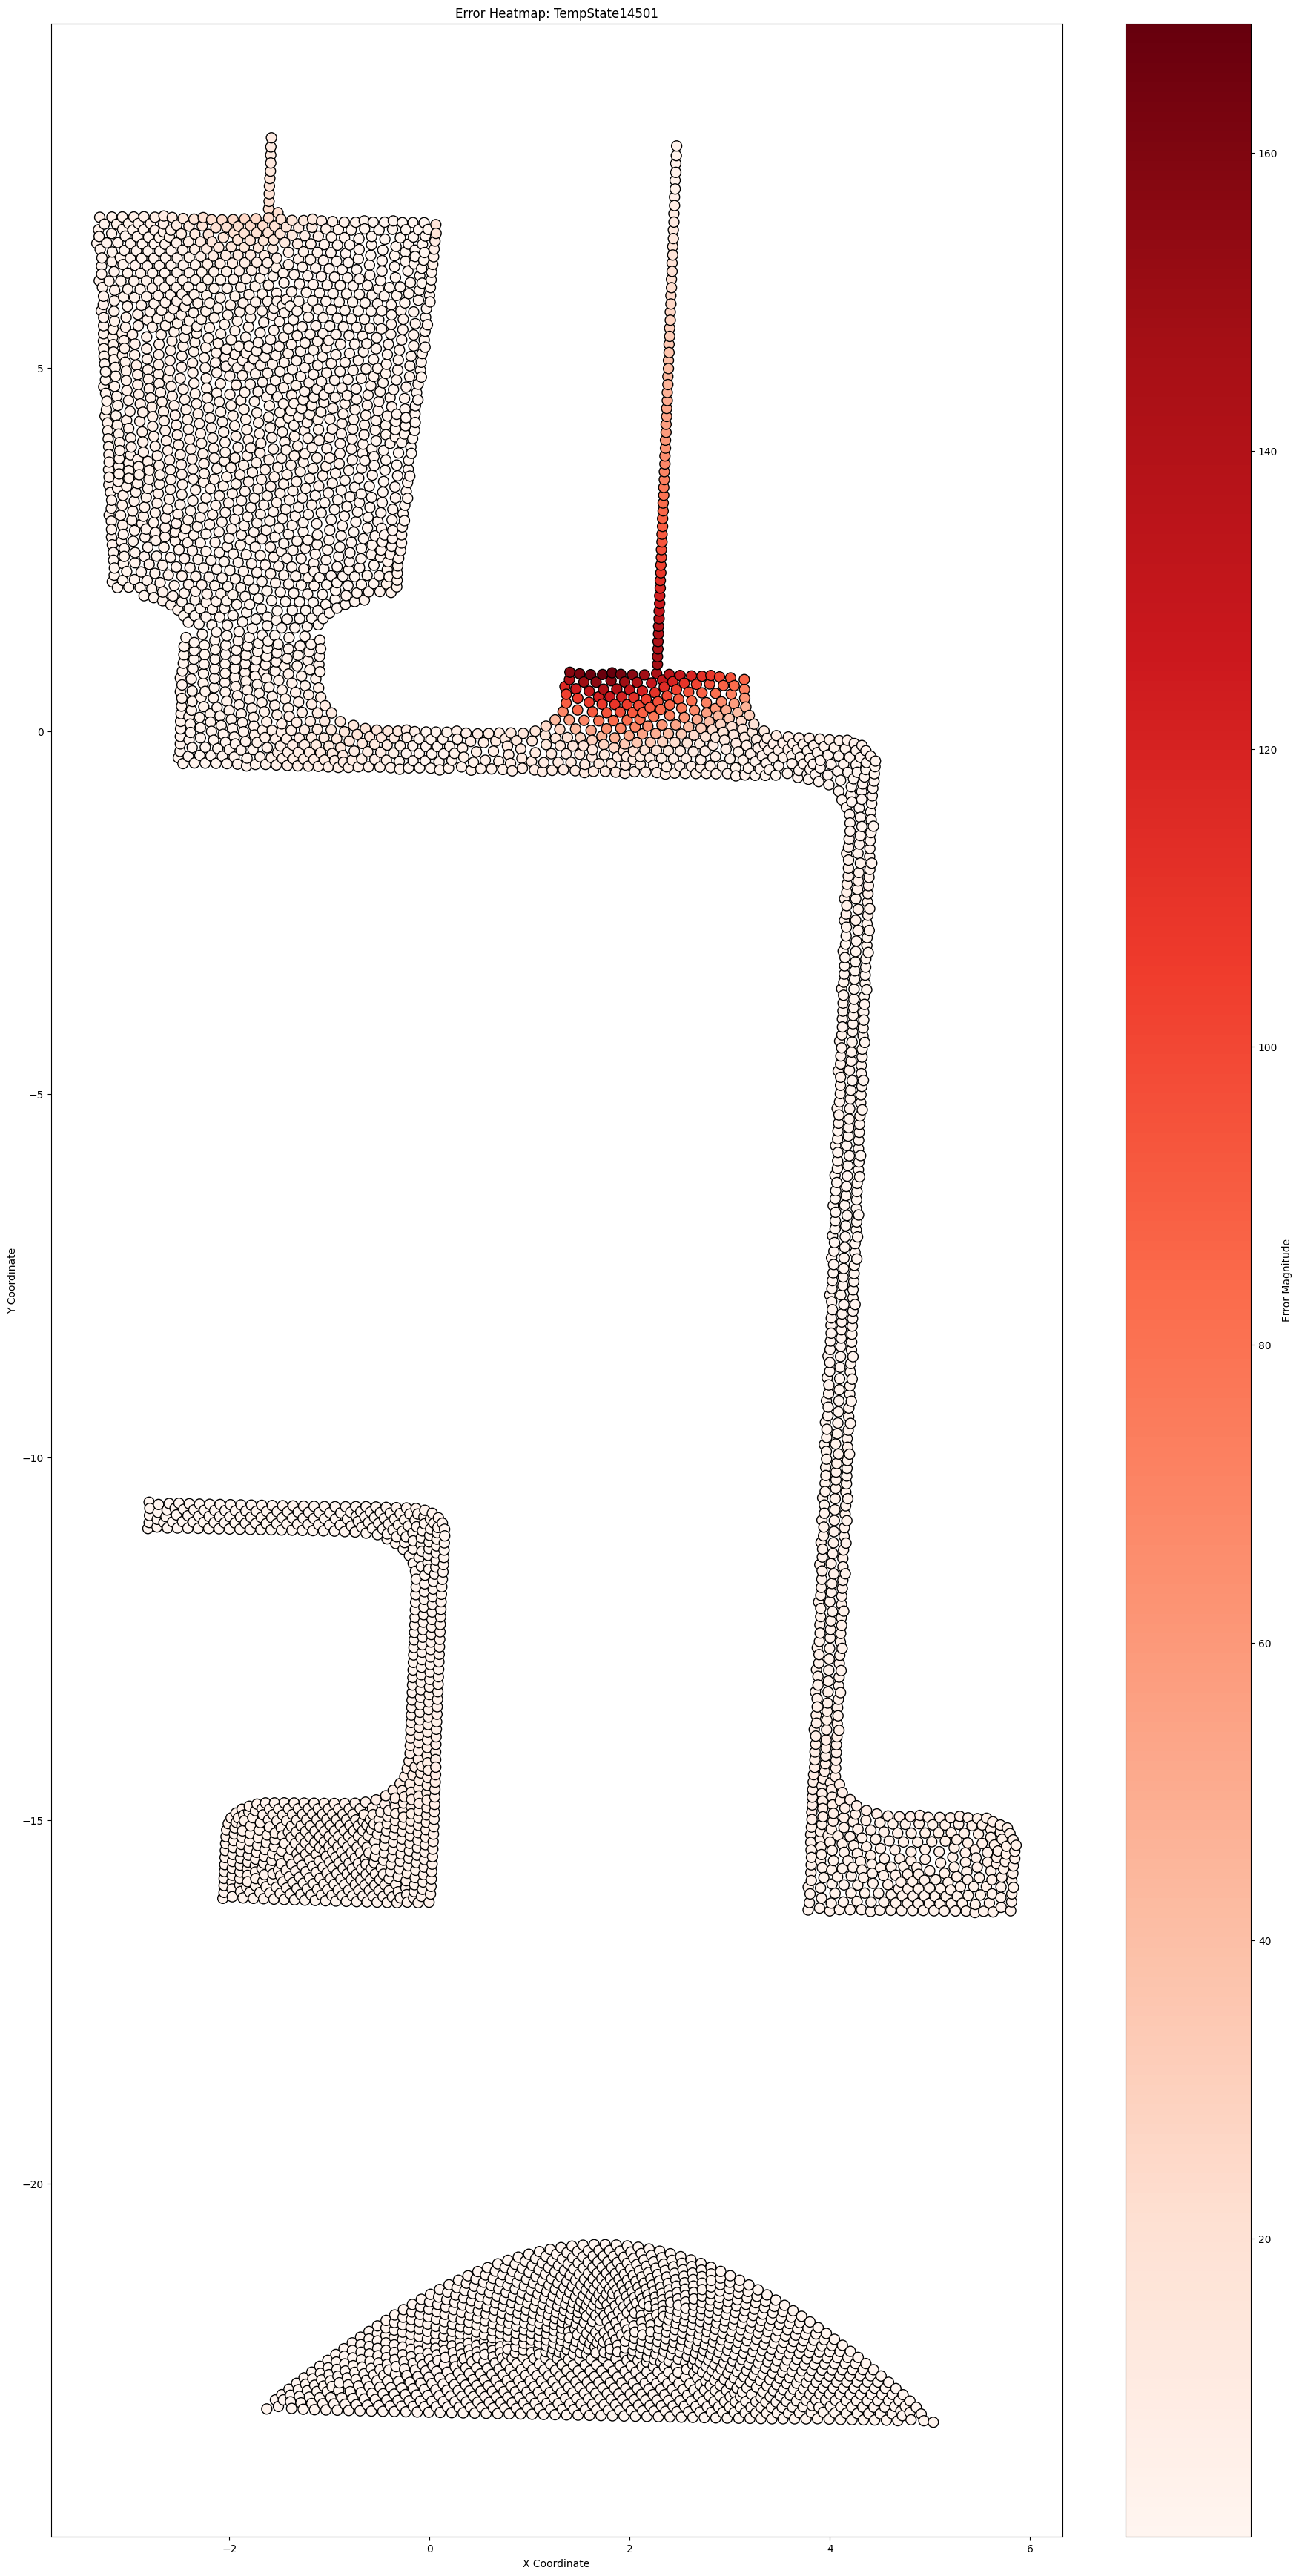

In [46]:
state_name = 'TempState14501'
error = np.abs(real_data[state_name] - predicted_data[state_name])

# Plot
plt.figure(figsize=(22, 44))
scatter = plt.scatter(real_data['X'], real_data['Y'], c=error, cmap='Reds', edgecolor='k', s=100)
plt.colorbar(scatter, label="Error Magnitude")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title(f"Error Heatmap: {state_name}")

plt.show()

In [40]:
# Compute Error

ME= np.abs(real_data[[state_name]] - predicted_data[[state_name]])
RSE= np.abs(real_data[[state_name]] - predicted_data[[state_name]])/real_data[[state_name]]
RMSE= np.sqrt(np.mean((real_data[[state_name]] - predicted_data[[state_name]])**2))


print('Mean Error:',ME.mean())  
print('Relative Squared Error:',RSE.mean())
print('Root Mean Squared Error:',RMSE)  


Mean Error: TempState22001    7.396687
dtype: float64
Relative Squared Error: TempState22001    0.009702
dtype: float64
Root Mean Squared Error: 16.209994491115104
